In [1]:
from Bio import SeqIO
from Bio.SeqUtils import GC
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def filter_read(read, min_quality=20, min_good_nucl_percentage=0.5):
    # возвращает последовательность из нуклеотидов только хорошего качества 
    # или пустую строку, если таких нуклеотидов оказалось меньше заданной доли
    filtered = ""
    for (nucl, q) in zip(read.seq, read.letter_annotations["phred_quality"]):
        if q >= min_quality:
            filtered += nucl
    if len(filtered) / len(read.seq) >= min_good_nucl_percentage:
        return filtered
    else:
        return ""

In [3]:
def count_GC_content(filename, format_, min_quality=20, min_good_nucl_percentage=0.5):
    GC_content_list = []
    for read in SeqIO.parse(filename, format_):
        filtered = filter_read(read, min_quality, min_good_nucl_percentage)
        if len(filtered) > 0:
            GC_content_list.append(GC(filtered))
            
    return GC_content_list

# Гистограммы плотности распределения GC-состава для ридов в файлах 100x.1 и 100x.2

При построении гистограмм не учитывались нуклеотиды с качеством ниже 20 и риды, в которых доля нуклеотидов с качеством >20 составляла менее 0.5

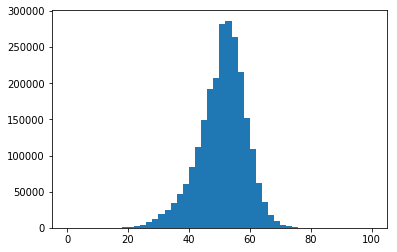

In [4]:
GC_cont1 = count_GC_content("data/100x.1.fastq", "fastq", 
                           min_quality=20, min_good_nucl_percentage=0.5)
plt.hist(GC_cont1, bins=50)
plt.savefig("gc1.png")

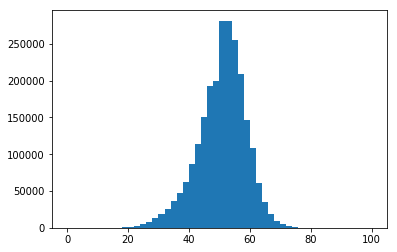

In [5]:
GC_cont2 = count_GC_content("data/100x.2.fastq", "fastq", 
                           min_quality=20, min_good_nucl_percentage=0.5)
plt.hist(GC_cont2, bins=50)
plt.savefig("gc2.png")

In [6]:
print("Средний GC-состав ридов в файле 100x.1: {:.3}%\n"
      "Средний GC-состав ридов в файле 100x.2: {:.3}%".format(sum(GC_cont1) / len(GC_cont1),
                                                                sum(GC_cont2) / len(GC_cont2)))

Средний GC-состав ридов в файле 100x.1: 50.8%
Средний GC-состав ридов в файле 100x.2: 50.7%


# Распределение GC-состава ридов в файле 100x.1, построенное программой fastq
![gc1](data/100x.1.gc_cont_distribution.png)

# Распределение GC-состава ридов в файле 100x.2, построенное программой fastq
![gc2](data/100x.2.gc_cont_distribution.png)